# Final Project Cramer's V Correlation

Cramer’s V lies between 0 and 1 (inclusive). 0 indicates that the two variables are not linked by any relation. 1 indicates that there exists a strong association between the two variables. Cramer’s V can be calculated by using the below formula:

    √(X2/N) / min(C-1, R-1)

    Here, 

        X2: It is the Chi-square statistic
        N: It represents the total sample size
        R: It is equal to the number of rows
        C: It is equal to the number of columns
References:
https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook
https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/

In [1]:
import pandas as pd
data = pd.read_csv("Maryland_state_crash.csv",low_memory=False) 

In [2]:
data

,Unnamed: 0,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,...,AGENCY_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,MAINROAD_NAME,LATITUDE,LONGITUDE
0,0,2020,Q2,Daylight,1.00,BALTIMORE,3.0,Other,88,NaN,...,BACOPD,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,39.277263,-76.503693
1,1,2022,Q2,Dark Lights On,3.00,MONTGOMERY,15.0,Other,88,NaN,...,MONTGOMERY,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,38.992210,-77.097021
2,2,2020,Q4,NaN,6.02,BALTIMORE,3.0,Other,88,NaN,...,BACOPD,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,39.323620,-76.503080
3,3,2022,Q1,Daylight,1.00,BALTIMORE,3.0,Other,88,NaN,...,BACOPD,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,39.411213,-76.628028
4,4,2022,Q2,Dark Lights On,3.00,QUEEN ANNE'S,17.0,Single Vehicle,17,NaN,...,MDTA,Fixed Object,9.0,Not Applicable,0.0,NaN,NaN,NaN,38.974880,-76.281090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506884,848799,2022,Q3,Daylight,1.00,ANNE ARUNDEL,2.0,Head On,1,Dry,...,AACOPD,Other Vehicle,1.0,Other Vehicle,1.0,605.0,CO,STEWART AVE,39.158164,-76.628893
506885,848800,2022,Q3,Daylight,1.00,BALTIMORE,3.0,Head On Left Turn,2,Dry,...,BACOPD,Other Vehicle,1.0,Fixed Object,9.0,45.0,MD,YORK RD,39.378626,-76.608568
506886,848801,2022,Q3,Daylight,1.00,BALTIMORE,3.0,Same Direction Left Turn,9,Dry,...,BACOPD,Other Vehicle,1.0,Not Applicable,0.0,40.0,US,PULASKI HWY,39.387539,-76.418305
506887,848802,2022,Q3,Daylight,1.00,ANNE ARUNDEL,2.0,Other,88,Dry,...,NRP,Other Vehicle,1.0,Not Applicable,0.0,13.0,SR,SOUTH BEACH RD,39.019090,-76.403650


In [3]:
# select only the categorical valriables
data = data[[i for i in data.columns if i in ('LIGHT_DESC','COLLISION_TYPE_DESC','SURF_COND_DESC',
'RD_DIV_DESC','REPORT_TYPE','WEATHER_DESC','HARM_EVENT_DESC1')]]

#drop rows with empty rows
data = data.dropna()

data.shape

(48280, 7)

In [4]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() #create empty data frame

#Fit label encoder and return encoded labels
for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

In [5]:
data_encoded

,LIGHT_DESC,COLLISION_TYPE_DESC,SURF_COND_DESC,RD_DIV_DESC,REPORT_TYPE,WEATHER_DESC,HARM_EVENT_DESC1
0,2,11,7,4,2,5,16
1,2,16,0,5,2,3,16
2,2,8,7,5,2,5,16
3,2,8,0,5,1,3,13
4,0,17,7,3,2,5,10
...,...,...,...,...,...,...,...
48275,5,18,6,1,2,7,18
48276,2,17,7,4,2,5,6
48277,0,11,0,5,2,3,16
48278,2,11,7,5,2,5,16


In [6]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [7]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

In [8]:
df

,LIGHT_DESC,COLLISION_TYPE_DESC,SURF_COND_DESC,RD_DIV_DESC,REPORT_TYPE,WEATHER_DESC,HARM_EVENT_DESC1
LIGHT_DESC,1.00,0.06,0.10,0.02,0.01,0.09,0.03
COLLISION_TYPE_DESC,0.06,1.00,0.03,0.02,0.02,0.02,0.06
SURF_COND_DESC,0.10,0.03,1.00,0.02,0.00,0.26,0.02
RD_DIV_DESC,0.02,0.02,0.02,1.00,0.00,0.01,0.02
REPORT_TYPE,0.01,0.02,0.00,0.00,1.00,0.00,0.04
WEATHER_DESC,0.09,0.02,0.26,0.01,0.00,1.00,0.02
HARM_EVENT_DESC1,0.03,0.06,0.02,0.02,0.04,0.02,1.00


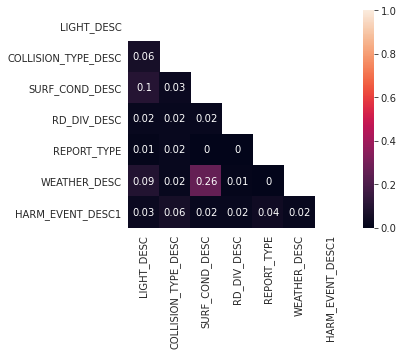

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Put the data into a heatmap visualization
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True, annot=True)

plt.show()

Appears that there is some but not strong correlation between the weather and surface condition (0.26) very low correlation otherwise between the other categories.